In [10]:
import numpy as np 
import pandas as pd

# Import TCGA melanoma data 
## Rna read data
file='../data/counts.txt'
with open(file, 'rt') as f: 
    read_counts=pd.read_csv(f,index_col=0) 
    
## Reference genome
file2='../data/genes.csv'
with open(file2, 'rt') as f: 
    gene_reference=pd.read_csv(f,index_col=0) 

In [11]:
read_counts

,00624286-41dd-476f-a63b-d2a5f484bb45,TCGA-FS-A1Z0,TCGA-D9-A3Z1,02c76d24-f1d2-4029-95b4-8be3bda8fdbe,TCGA-EB-A51B,TCGA-D3-A1Q3,TCGA-FR-A44A,TCGA-EE-A17Z,TCGA-D3-A51G,TCGA-D3-A51E,...,TCGA-D9-A149,TCGA-EE-A3AG,TCGA-D9-A4Z2,TCGA-EB-A4OZ,TCGA-EE-A3J4,TCGA-FS-A1ZM,TCGA-D3-A5GS,TCGA-EB-A3XF,TCGA-EE-A2GE,ff7431a9-243a-4651-80bb-096379925bbe
A1BG,1272.36,452.96,288.06,400.11,420.46,877.59,402.77,559.20,269.59,586.66,...,631.78,560.60,846.55,678.00,32.88,997.41,256.93,461.60,634.06,530.36
A1CF,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,4.00,3.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
A2BP1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00
A2LD1,164.38,552.43,201.83,165.12,95.75,636.63,241.56,30.82,105.44,239.19,...,218.47,274.45,770.04,71.74,17.00,194.26,156.81,84.35,242.01,377.03
A2ML1,27.00,0.00,0.00,0.00,8.00,0.00,1.00,763.00,0.00,0.00,...,3.00,6.00,0.00,1043.00,1.00,852.00,4.00,587.00,0.00,2.00
A2M,65232.35,61911.87,99195.94,12880.89,83380.84,39417.73,358068.86,16470.99,320261.89,162625.78,...,22861.93,28221.61,87252.65,9300.02,103333.98,1222615.54,70911.72,85091.90,253599.66,71228.78
A4GALT,190.00,213.00,103.00,752.00,38.00,301.00,424.00,97.00,693.00,99.00,...,160.00,1020.00,177.00,369.00,99.00,422.00,154.00,81.00,1210.00,380.00
A4GNT,5.00,0.00,1.00,1.00,0.00,3.00,2.00,0.00,20.00,3.00,...,1.00,1.00,6.00,0.00,0.00,8.00,1.00,0.00,2.00,1.00
AAA1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
AAAS,2449.00,2181.00,1203.00,1440.00,1646.00,3353.00,2422.00,1357.00,1617.00,2097.00,...,3484.00,5248.00,3275.00,1798.00,2325.00,2784.00,2430.00,1932.00,2613.00,2243.00


In [13]:
gene_reference

,GeneID,GeneLength
GeneSymbol,,
CPA1,1357,1724
GUCY2D,3000,3623
UBC,7316,2687
C11orf95,65998,5581
ANKMY2,57037,2611
C17orf81,23587,2399
TTC36,143941,814
IQCD,115811,2367
HSPA13,6782,3984


In [14]:
matched_index=pd.Index.intersection(read_counts.index, gene_reference.index)

In [15]:
matched_index

Index(['A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1', 'A2M', 'A4GALT', 'A4GNT',
       'AAA1', 'AAAS',
       ...
       'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3',
       'psiTPTE22', 'tAKR'],
      dtype='object', length=20500)

In [16]:
counts=np.asarray(read_counts.loc[matched_index], dtype=int)

In [17]:
counts

array([[1272,  452,  288, ...,  461,  634,  530],
       [   0,    0,    0, ...,    0,    1,    0],
       [   0,    0,    0, ...,    0,    2,    1],
       ...,
       [ 710, 2889, 3197, ..., 3284, 1764, 2208],
       [   3,   11,   26, ...,   15,  106,   41],
       [   0,    0,    0, ...,    0,    3,    1]])

In [18]:
genes_name=np.array(matched_index)

In [19]:
genes_name

array(['A1BG', 'A1CF', 'A2BP1', ..., 'ZZZ3', 'psiTPTE22', 'tAKR'],
      dtype=object)

In [21]:
print(f'{counts.shape[0]} genes measured in {counts.shape[1]} individuals') 

20500 genes measured in 375 individuals


In [23]:
print(counts.shape, genes_name.shape)

(20500, 375) (20500,)


In [27]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [29]:
total_counts=np.sum(counts, axis=0)

In [31]:
from scipy import stats

density=stats.kde.gaussian_kde(total_counts)


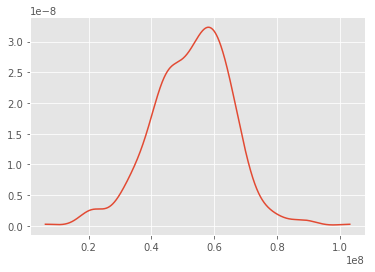

In [36]:
density

x=np.arange(min(total_counts),max(total_counts), 10000)

fig,ax=plt.subplots()
ax.plot(x,density(x))

In [38]:
np.random.seed(seed=17)
samples_index=np.random.choice(range(counts.shape[1]), size=70, replace=False)
counts_subset=counts[:,samples_index]


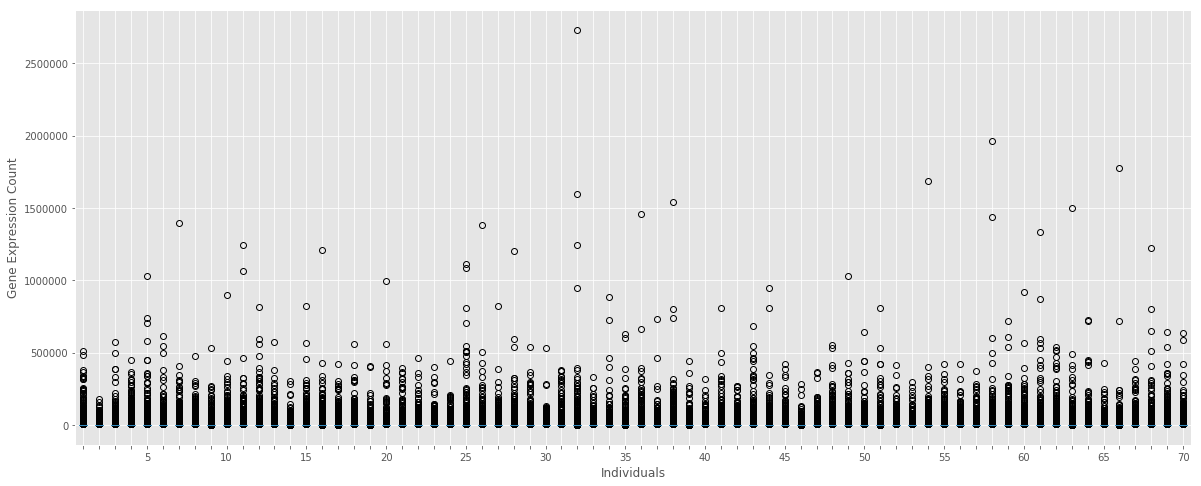

In [48]:
def reduce_x_axis(ax,factor):
    plt.setp(ax.xaxis.get_ticklabels(),visible=False)
    for label in ax.xaxis.get_ticklabels()[factor-1::factor]:
        label.set_visible(True)

fig,ax= plt.subplots(figsize=(20,8))

with plt.style.context('ggplot'):
    ax.boxplot(counts_subset)
    ax.set_xlabel("Individuals")
    ax.set_ylabel("Gene Expression Count")
    reduce_x_axis(ax,5)

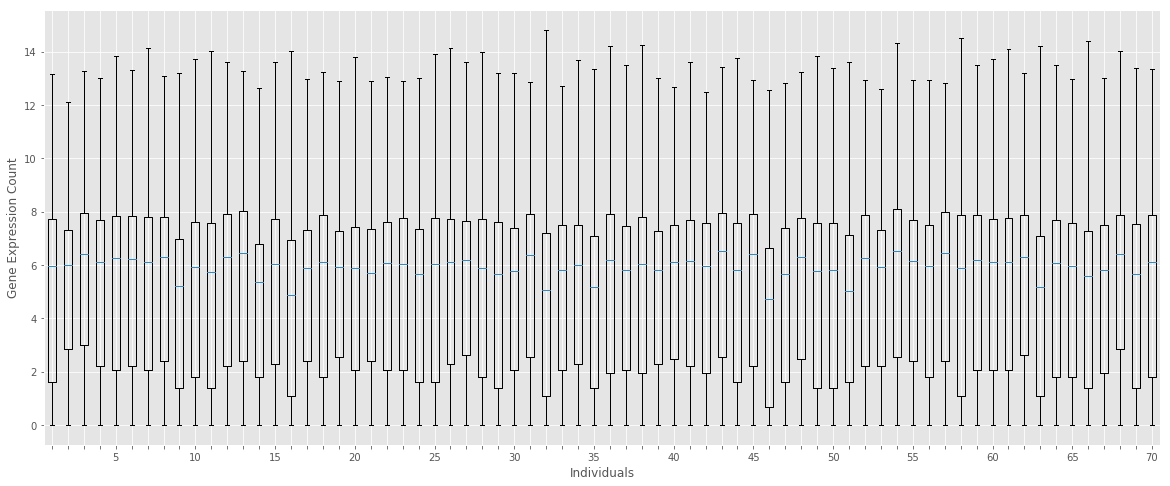

In [51]:
fig,ax= plt.subplots(figsize=(20,8))

with plt.style.context('ggplot'):
    ax.boxplot(np.log(counts_subset +1 ))
    ax.set_xlabel("Individuals")
    ax.set_ylabel("Gene Expression Count")
    reduce_x_axis(ax,5)

In [55]:
counts_lib_norm=counts/total_counts * 1000000
counts_lib_subset=counts_lib_norm[:,samples_index]

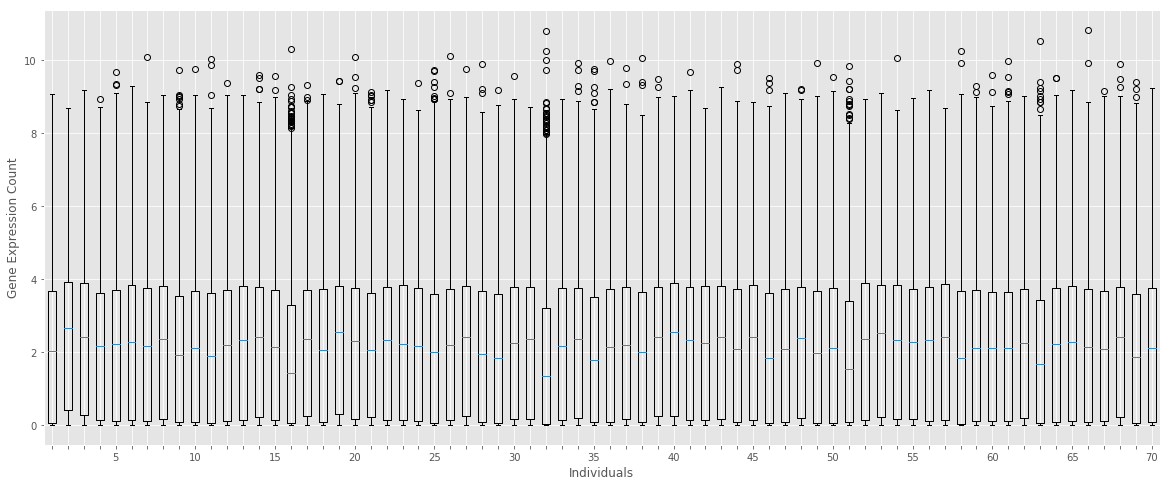

In [56]:
fig,ax= plt.subplots(figsize=(20,8))

with plt.style.context('ggplot'):
    ax.boxplot(np.log(counts_lib_subset +1 ))
    ax.set_xlabel("Individuals")
    ax.set_ylabel("Gene Expression Count")
    reduce_x_axis(ax,5)